In [1]:
import iris
import iris.analysis
import iris.quickplot as qplt
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.dates as mdates

In [2]:
# Bodeker Scientific TCO dataset - https://www.bodekerscientific.com/data/total-column-ozone
# this has been preprocessed into a single file using ncks, ncatted, and ncrcat
# for i in `ls *.nc`; do echo $i; ncks -O --mk_rec_dmn time $i $i; done
# for i in `ls *.nc`; do echo $i; ncatted -O -a created,global,d,, $i; done
# for i in `ls *.nc`; do echo $i; ncatted -O -a units,longitude,o,c,degrees_east $i; done
# for i in `ls *.nc`; do echo $i; ncatted -O -a units,latitude,o,c,degrees_north $i; done
# ncrcat BSFilledTCO_V3.4.1_????_Monthly.nc ../BSFilledTCO_V3.4.1_Monthly.nc
obsdata='/home/ubuntu/Tutorials/UMvn13.0/data/Bodeker_3.4.1/*.nc'
# We would like to thank Bodeker Scientific, funded by the New Zealand Deep South National 
# Science Challenge, for providing the combined NIWA-BS total column ozone database.

In [3]:
obs=iris.load_cube(obsdata,'equivalent_thickness_at_stp_of_atmosphere_ozone_content')

In [4]:
obs_zm=obs.collapsed('longitude',iris.analysis.MEAN)

/home/ubuntu/miniconda3/lib/python3.9/site-packages/iris/coords.py:2223: UserWarning: Collapsing a non-contiguous coordinate. Metadata may not be fully descriptive for 'longitude'.
  warnings.warn(msg.format(self.name()))


In [5]:
clevs=np.arange(120,500,20)

Text(0.5, 0, 'Time / year')

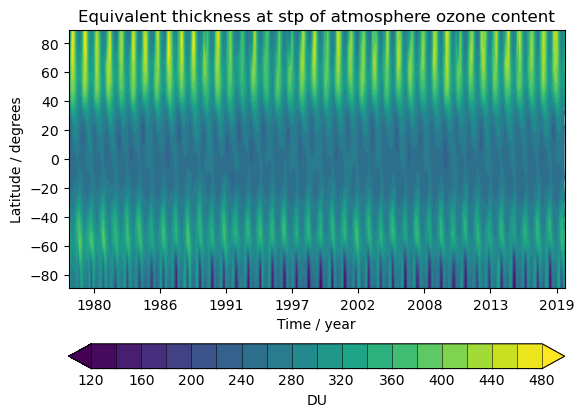

In [6]:
qplt.contourf(obs_zm, clevs, extend='both')
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y'))
plt.xlabel('Time / year')

In [7]:
# UKCA model data from ACSIS project, nudged to ERA5
ukcadata='/home/ubuntu/Tutorials/UMvn13.0/data/u-*/apm.pp/*.pp'

In [8]:
ukca=iris.load_cube(ukcadata,iris.AttributeConstraint(STASH='m01s50i219'))

/home/ubuntu/miniconda3/lib/python3.9/site-packages/iris/fileformats/rules.py:353: UserWarning: Unable to create instance of HybridHeightFactory. The source data contains no field(s) for 'orography'.
  warnings.warn(msg.format(factory=factory_name))


In [9]:
ukca_zm=ukca.collapsed('longitude',iris.analysis.MEAN)

/home/ubuntu/miniconda3/lib/python3.9/site-packages/iris/coords.py:2223: UserWarning: Collapsing a non-contiguous coordinate. Metadata may not be fully descriptive for 'longitude'.
  warnings.warn(msg.format(self.name()))


Text(0.5, 0, 'Time / year')

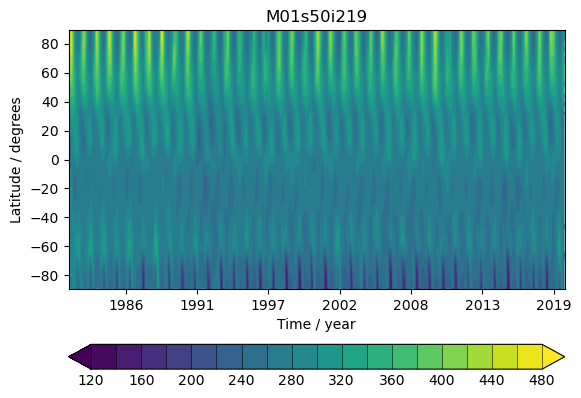

In [10]:
qplt.contourf(ukca_zm, clevs, extend='both')
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y'))
plt.xlabel('Time / year')

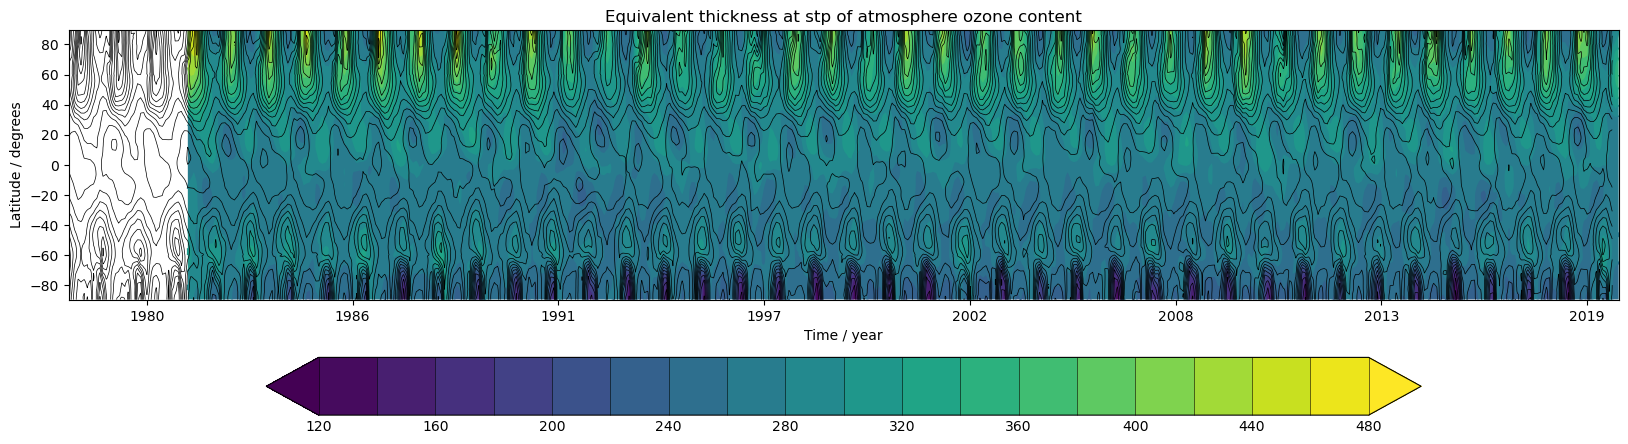

In [11]:
# quite a lot of data so stretch the plot
plt.figure(figsize=(20,5))
qplt.contourf(ukca_zm, clevs, extend='both')
qplt.contour(obs_zm, clevs, colors='k', linewidths=0.5)
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y'))
plt.xlabel('Time / year')
plt.show()